# Linear Latent Variable Models

Linear Latent Variable Models (LLVMs) are a class of generative models that assume a linear relationship between observed variables and so-called latent variables. They are commonly used for dimensionality reduction, clustering, and visualization of high-dimensional data.


LLVMs can be divided into two main categories:


* **Probabilistic**: Assume that the observed variables are generated from a probability distribution.

* **Deterministic**: Assume that the observed variables are a deterministic function of the latent variables.


## Probabilistic LLVMs


* **Principal Component Analysis (PCA)**: Linear technique that finds the directions of maximum variance in the data.

* **Factor Analysis (FA)**: A more general technique that also takes into account the correlation between variables.
Both methods can be used for dimensionality reduction by projecting the data onto the first few principal components or factors.


## Deterministic LLVMs


* **Linear Discriminant Analysis (LDA)**: A supervised technique that finds the directions that best discriminate between classes.

* **Multidimensional Scaling (MDS)**: An unsupervised technique that finds a low-dimensional representation of the data that preserves the pairwise distances between points.


### Principal Component Analysis

Principal Component Analysis is a technique to find the directions of maximum variance in the data.

### Use Cases

1. **Dimensionality Reduction**: PCA can be used to reduce the number of features in a dataset while preserving as much of the original variance as possible. This can help to improve the performance of machine learning algorithms that are sensitive to the number of features, such as linear regression and k-nearest neighbors.

2. **Data Compression**: PCA can be used to compress a dataset by representing it using a smaller number of features. This can help to reduce the storage and computational costs associated with large datasets.

3. **Visualization**: PCA can be used to visualize high-dimensional data in a 2D or 3D plot by projecting it onto the first principal components. This can help to identify patterns and relationships in the data that are not immediately apparent in the original high-dimensional space.

A simple example using ```numpy``` package:

In [1]:
import numpy as np

# Generate sample data in a 5-dimensional space
np.random.seed(0)
data = np.random.randn(100, 5)

# Subtract the mean from the data
data_mean = np.mean(data, axis=0)
data_centered = data - data_mean

# Calculate the covariance matrix
cov_matrix = np.cov(data_centered, rowvar=False)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Transform the data to the first two principal components
data_pca = np.dot(data_centered, eigenvectors[:, :2])

Visualise our projection by choosing two eigenvectors with the highest eigenvalues.

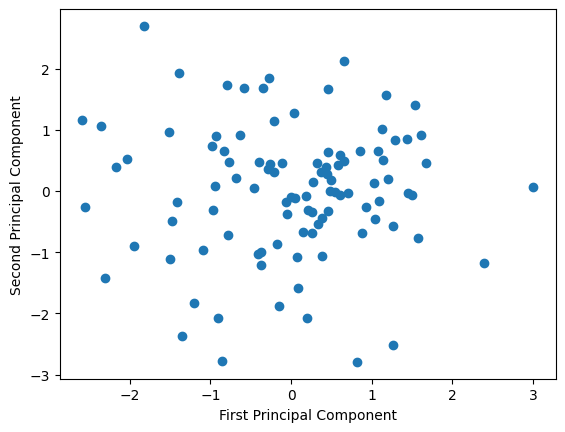

In [2]:
import matplotlib.pyplot as plt
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

It is even easier with the ```sklearn``` package:

In [6]:
from sklearn.decomposition import PCA

# Create an instance of the PCA class
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(data)

# Transform the data to the first two principal components
data_pca = pca.transform(data)

# Print the explained variance ratio of the first two principal components
print(pca.explained_variance_ratio_)

[0.24267417 0.23235282]


PCA is a widely used technique with applications in many fields, including:

* **Chemistry**: PCA is often used for data analysis of molecular spectroscopic data to identifying patterns in chemical compounds or to compute molecular structures from the observed distances.

* **Computer Vision**: PCA is used to reduce the dimensionality of images, and to extract important features from images. It is also used to classify images by comparing the features of an image to some specified features.

* **Finance**: PCA is used in portfolio and risk management. It can be used to identify the underlying factors that drive stock returns and to construct portfolios that are diversified across different factors.

* **Social Sciences**: PCA is used in social sciences to identify patterns and relationships in survey data, and to identify the underlying factors that drive the responses.



Lets apply it in the computer vision context...

In [2]:
# Download the MNIST dataset
mnist = fetch_openml("mnist_784")
data = mnist.data

np.save('data/mnist_data.npy', data)
np.save('data/mnist_labels.npy', mnist.target)

NameError: name 'fetch_openml' is not defined

In [4]:
import numpy as np
# Load saved data
data = np.load('data/mnist_data.npy', allow_pickle=True)
target = np.load('data/mnist_labels.npy', allow_pickle=True)

In [7]:
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(70000, 784)


In [8]:
# Cast string labels as floats
target = list(map(float, target))

# Create an instance of the PCA class
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(data)

# Transform the data to the first two principal components
data_pca = pca.transform(data)

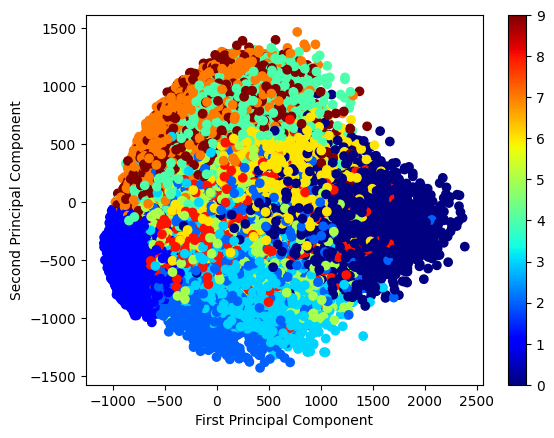

In [9]:
# Plot the first two principal components
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='jet')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

In the plot one can see that similar numbers are clustered. This indicates that samples from the same class share similar features.

The PCA applied to financial data can help to:

1. Identify clusters of similar assets.
2. Build predictive models, where one can use the principals components as new variables to predict some quantities.

Now, lets apply PCA in a financial application...

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [21]:
# Download data from Yahoo finance

import yfinance as yf

portfolio = ['MBG.DE', 'BMW.DE',  # Automotive
			 'LHA.DE', 'AF.PA',  # Airlines
			 'BAYN.DE', 'NVS', 'RO.SW',  # Pharmaceuticals
			 'AAPL', 'AMZN', 'GOOG'  # Tech
			 ]

start_date = datetime(2016, 1, 1)
end_date = datetime(2022, 1, 1)

df = pd.DataFrame()

for stock in portfolio:
	df[stock] = yf.download(stock, start=start_date, end=end_date, interval='1d')['Adj Close']

df.to_csv('data/finance_toy_data.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [56]:
# Load local data
portfolio = ['MBG.DE', 'BMW.DE',  # Automotive
			 'LHA.DE', 'AF.PA',  # Airlines
			 'BAYN.DE', 'NVS', 'RO.SW',  # Pharmaceuticals
			 'AAPL', 'AMZN', 'GOOG'  # Tech
			 ]

df = pd.read_csv('data/finance_toy_data.csv', index_col=0)

In [57]:
# Compute normalised returns
r = df.pct_change().dropna().T

mean_return = r.mean(axis=1)

In [58]:
# Create an instance of the PCA class
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(r)

# Transform the data to the first two principal components
data_pca = pca.transform(r)

print(pca.explained_variance_ratio_)

[0.40273122 0.17428425]


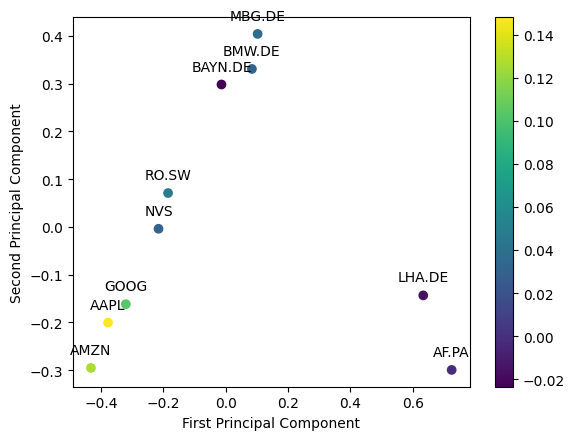

In [59]:
# Plot the first two principal components
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=mean_return.to_numpy() * 100, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()

# Add labels

for i, label in enumerate(portfolio):
    plt.annotate(label, (data_pca[i, 0], data_pca[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

The scatter plot reveals that assets with similar characteristics, such as tech companies (bottom-left corner) or airlines (bottom-right corner), tend to form clusters. The first principal component can be interpreted as the asset return axis, while the second principal component represents the volatility or variance of returns.

For instance, Apple (AAPL) had high average returns, but also high volatility. On the other hand, Lufthansa (LHA.DE) yields negative gains but facing also high volatility (This is due to a sharp price drop during the covid crysis). This is why, AAPL and LHA are closely positioned on the Y-axis but substantially deviate on the X-axis. 

Companies in the upper-mid section, such as BMW, provided acceptable gains, and as a relatively conservative company, its volatility tends to be low. Hence, the scatter is centered on the X-axis and is at the upper part of the Y-axis.

Explained variance ratio: [0.19837711 0.09713147]


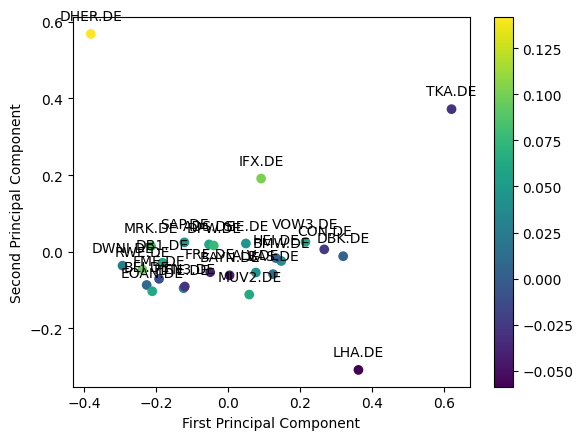

In [60]:
# One more example
portfolio = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'CON.DE', 'DB1.DE', 'DBK.DE', 'DHER.DE', 'DPW.DE', 'DTE.DE', 'DWNI.DE', 'EOAN.DE', 'FME.DE', 'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE', 'SAP.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE']

df = pd.read_csv('data/finance_dax_data.csv', index_col=0)
r = df.pct_change().dropna().T

mean_return = r.mean(axis=1)

pca = PCA(n_components=2)
pca.fit(r)
data_pca = pca.transform(r)

print('Explained variance ratio:', pca.explained_variance_ratio_)

# Plot the first two principal components
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=mean_return.to_numpy() * 100, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()

# Add labels

for i, label in enumerate(portfolio):
    plt.annotate(label, (data_pca[i, 0], data_pca[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

We can easily extend our analysis to a high amount of assets. Here, we load data of the DAX index (a stock index that includes 40 biggest German companies).

In this example we can see that two dimensions are insuffiecient to explain the data well (see explained varaince ratio), indicating that there are more importan hidden features. However, we can at least detect outliers in order to identify very good or bad performing assets. 